# **Hotel Booking Analysis**

##NICKY GHAI  



In [8]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Importing all the important libraries




In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


**Importing data from the local drive**


In [10]:
df = pd.read_csv('/content/drive/MyDrive/Hotel Bookings.csv')

In [11]:
df.head(10)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03
6,Resort Hotel,0,0,2015,July,27,1,0,2,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,0,No Deposit,NaN,NaN,0,Transient,107.0,0,0,Check-Out,2015-07-03
7,Resort Hotel,0,9,2015,July,27,1,0,2,2,0.0,0,FB,PRT,Direct,Direct,0,0,0,C,C,0,No Deposit,303.0,NaN,0,Transient,103.0,0,1,Check-Out,2015-07-03
8,Resort Hotel,1,85,2015,July,27,1,0,3,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,82.0,0,1,Canceled,2015-05-06
9,Resort Hotel,1,75,2015,July,27,1,0,3,2,0.0,0,HB,PRT,Offline TA/TO,TA/TO,0,0,0,D,D,0,No Deposit,15.0,NaN,0,Transient,105.5,0,0,Canceled,2015-04-22


In [13]:
  df.shape

(119390, 32)

**To get the insight about the data, Let's check out the parameters mentioned in the columns**

In [14]:
list(df.columns)

['hotel',
 'is_canceled',
 'lead_time',
 'arrival_date_year',
 'arrival_date_month',
 'arrival_date_week_number',
 'arrival_date_day_of_month',
 'stays_in_weekend_nights',
 'stays_in_week_nights',
 'adults',
 'children',
 'babies',
 'meal',
 'country',
 'market_segment',
 'distribution_channel',
 'is_repeated_guest',
 'previous_cancellations',
 'previous_bookings_not_canceled',
 'reserved_room_type',
 'assigned_room_type',
 'booking_changes',
 'deposit_type',
 'agent',
 'company',
 'days_in_waiting_list',
 'customer_type',
 'adr',
 'required_car_parking_spaces',
 'total_of_special_requests',
 'reservation_status',
 'reservation_status_date']

**Broadly classifying the type of hotels we have in our data by the ploting a histogram**

In [25]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,86940.000000,86940.000000,86940.000000,86940.000000,86940.000000,86940.000000,86940.000000,86940.000000,86940.000000,86940.000000,86940.000000,86940.000000,86940.000000,86940.000000,86940.000000,86940.000000,86940.000000,86940.000000
mean,0.275903,80.193375,2016.211824,26.841477,15.818024,1.007396,2.628744,1.878525,0.139211,0.010835,0.039234,0.030228,0.176708,0.271854,0.753497,106.574804,0.083448,0.699459
std,0.446971,86.100147,0.686016,13.654505,8.834469,1.028763,2.043753,0.625860,0.456786,0.113592,0.194152,0.369574,1.717885,0.728090,10.041816,54.957439,0.280402,0.831840
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,12.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,72.250000,0.000000,0.000000
50%,0.000000,50.000000,2016.000000,27.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,98.400000,0.000000,0.000000
75%,1.000000,125.000000,2017.000000,37.000000,23.000000,2.000000,4.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,134.100000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,16.000000,41.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,391.000000,5400.000000,8.000000,5.000000


#DATA VISUALIZATION

 How many booking were cancelled 

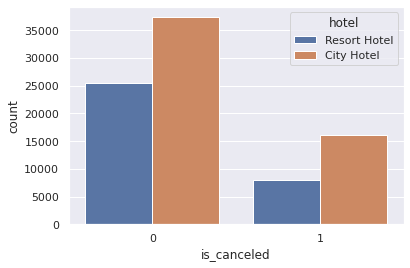

In [26]:
import seaborn as sns
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="is_canceled", hue ='hotel',data=df)

Special requests

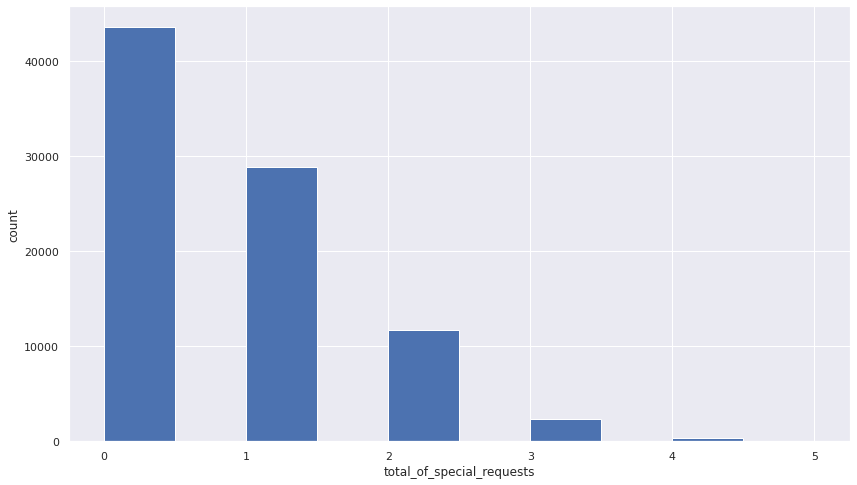

In [75]:
fig, ax = plt.subplots(figsize=(14,8))
ax.hist(df['total_of_special_requests'])
ax.set_xlabel('total_of_special_requests')
ax.set_ylabel('count')
plt.show()

After cleaning the data broadly classify the type of hotels we have in our data by the ploting a histogram

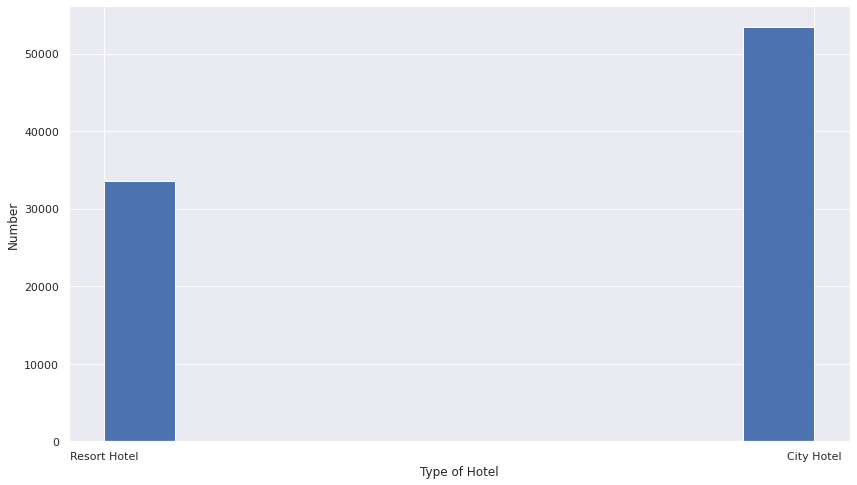

In [27]:
fig, ax = plt.subplots(figsize=(14,8))
ax.hist(df['hotel'])
ax.set_xlabel('Type of Hotel')
ax.set_ylabel('Number')
plt.show()

 the percentage of booking for each year

In [28]:
df['arrival_date_year'].value_counts()

2016    42124
2017    31616
2015    13200
Name: arrival_date_year, dtype: int64

In [29]:
len(df['arrival_date_year'])

86940

In [30]:
56623/119210

0.474985320023488

In [31]:
sns.set(color_codes=True)


year_percent_df = (df['arrival_date_year'].value_counts(normalize=True).mul(100).reset_index()).rename(columns ={'index':'Year','arrival_date_year':'percentage_of_booking'})
year_percent_df

,Year,percentage_of_booking
0,2016,48.451806
1,2017,36.365309
2,2015,15.182885


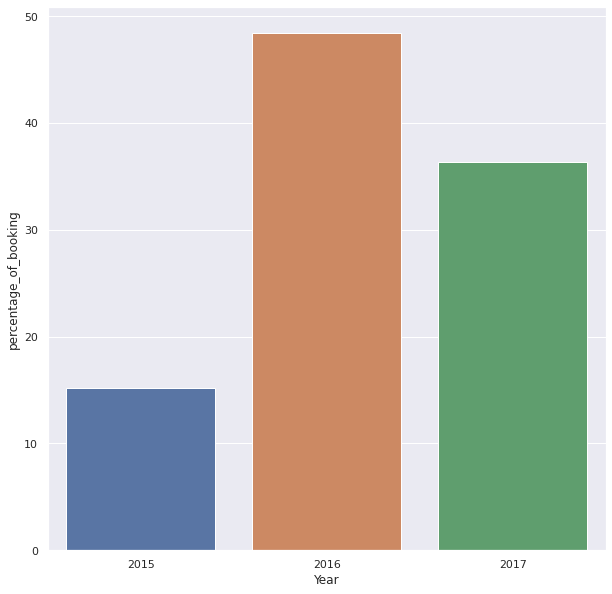

In [32]:
plt.figure(figsize=(10,10))
ax = sns.barplot(x="Year", y="percentage_of_booking", data=year_percent_df)

To check change in bookings

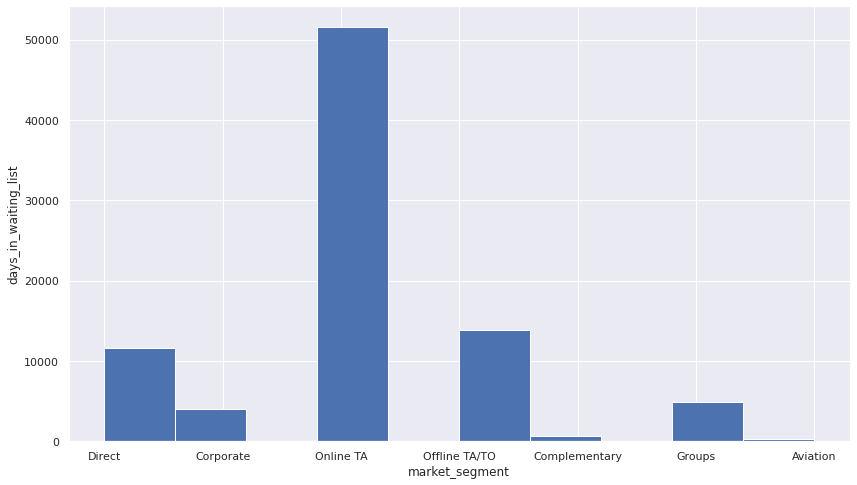

In [71]:
fig, ax = plt.subplots(figsize=(14,8))
ax.hist(df['market_segment'])
ax.set_xlabel('market_segment')
ax.set_ylabel('days_in_waiting_list')
plt.show()

Display the number of kids in both hotels

In [36]:
# Create a new dataframe to display hotel, adults, children, and babies only.
df1 = df[['hotel', 'adults', 'children', 'babies']]
df1['kids'] = df1['children'] + df1['babies']
df1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,hotel,adults,children,babies,kids
0,Resort Hotel,2,0.0,0,0.0
1,Resort Hotel,2,0.0,0,0.0
2,Resort Hotel,1,0.0,0,0.0
3,Resort Hotel,1,0.0,0,0.0
4,Resort Hotel,2,0.0,0,0.0
...,...,...,...,...,...
119385,City Hotel,2,0.0,0,0.0
119386,City Hotel,3,0.0,0,0.0
119387,City Hotel,2,0.0,0,0.0
119388,City Hotel,2,0.0,0,0.0


# Display the number of kids in both hotels.

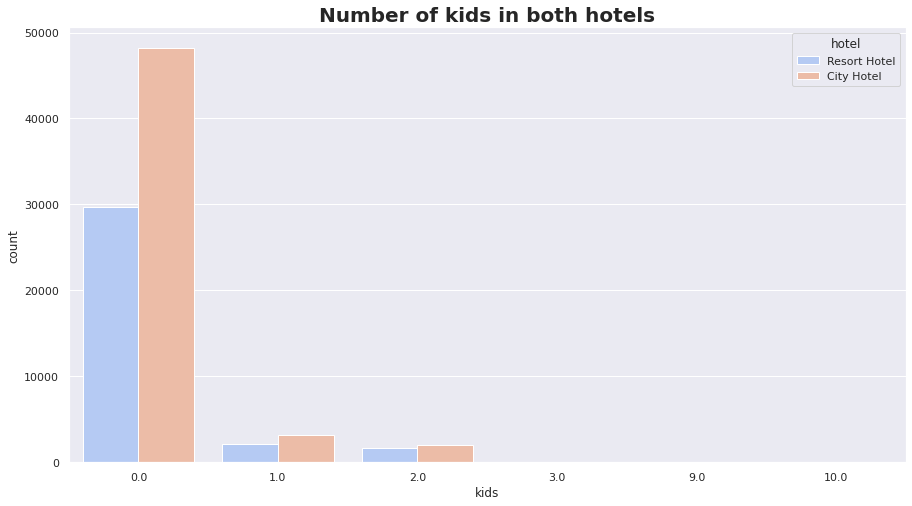

In [37]:
plt.figure(figsize=(15, 8))
sns.countplot(x='kids',hue='hotel', data=df1, palette='coolwarm')
plt.title("Number of kids in both hotels",fontweight="bold", size=20)

plt.show()

**Heatmap between type of Hotel and arrival month**

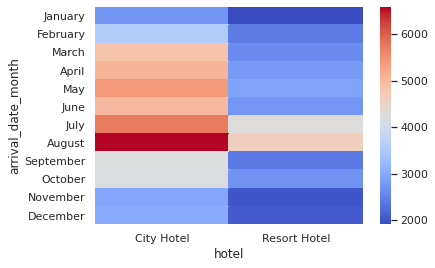

In [38]:
sns.heatmap(pd.crosstab(df.arrival_date_month,df.hotel),cmap='coolwarm')

Percentage of Cancellation by year

Text(0, 0.5, 'cancellation percentage')

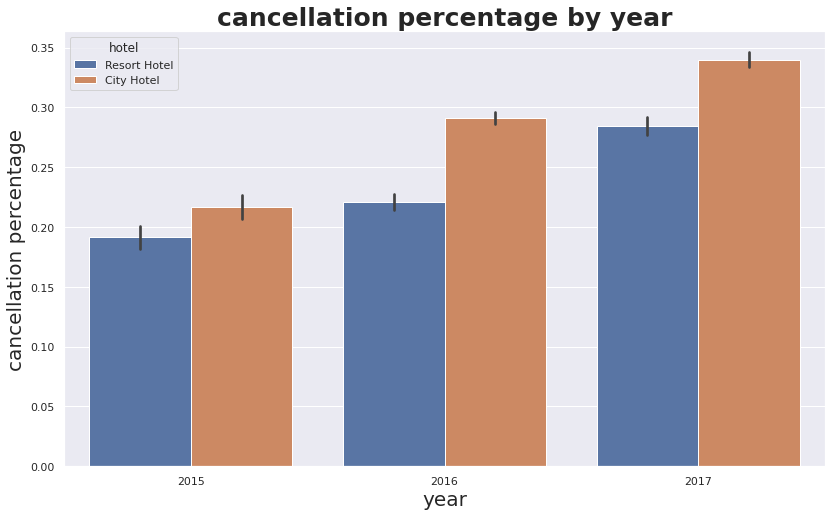

In [39]:
plt.figure(figsize=(30, 8))
plt.subplot(1, 2, 1)

sns.barplot(data = df, x= 'arrival_date_year', y = 'is_canceled',hue = 'hotel' )
plt.title('cancellation percentage by year',fontweight="bold", size=25)

plt.xlabel('year',size=20)
plt.ylabel('cancellation percentage',size=20)

Plot between resevation status and market segment

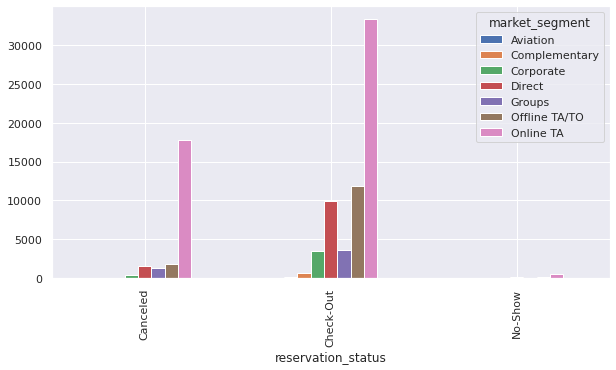

In [43]:
df6=df.groupby(['reservation_status','market_segment']).size()
df6=df6.unstack()
df6.plot(kind='bar',figsize=(10,5))

Let's now group the data based on month , to get some important insights

In [44]:
grp=df.groupby('arrival_date_month')

p = grp['lead_time'].agg(np.mean)

t = grp['days_in_waiting_list'].agg(np.sum)


Let's check out relation between the days before which booking is done which is known as lead time and month of the year


/usr/local/lib/python3.7/dist-packages/matplotlib/axes/_base.py:348: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]


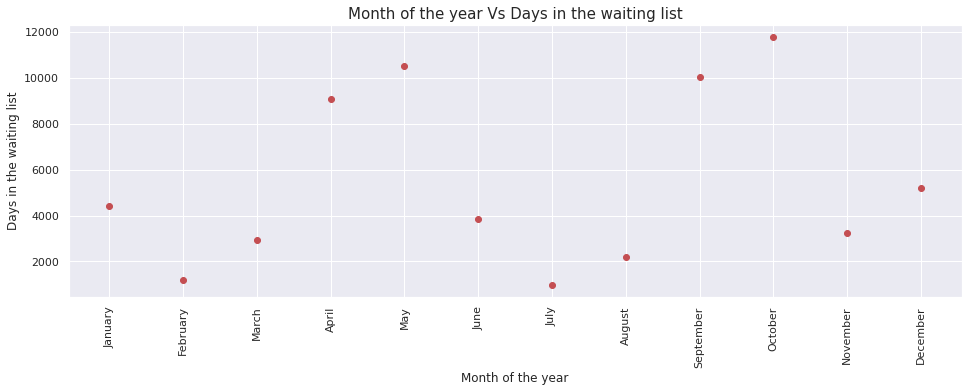

In [46]:
plt.figure(figsize=(16,5))
plt.plot(t,'ro',color='r')
plt.xticks(rotation=90)

plt.title('Month of the year Vs Days in the waiting list',fontsize=15)
plt.xlabel('Month of the year')
plt.ylabel('Days in the waiting list')
plt.show()

**From which country most guest are coming**

In [47]:
df[df['country']=='PRT']['hotel'].value_counts()

Resort Hotel    14238
City Hotel      13211
Name: hotel, dtype: int64

In [48]:
top_10_countries = df[df['is_canceled']==0]['country'].value_counts()[:10]

In [49]:
top_10_countries = top_10_countries.reset_index().rename(columns = {'index':'country','country':'number_of_bookings'})
top_10_countries['percentage'] = (top_10_countries['number_of_bookings']/top_10_countries['number_of_bookings'].sum())*100

In [50]:
top_10_countries

,country,number_of_bookings,percentage
0,PRT,17662,34.015099
1,GBR,8448,16.269933
2,FRA,7104,13.681535
3,ESP,5390,10.380556
4,DEU,4334,8.346815
5,IRL,2348,4.521994
6,ITA,1991,3.834450
7,BEL,1670,3.216239
8,NLD,1561,3.006317
9,USA,1416,2.727063


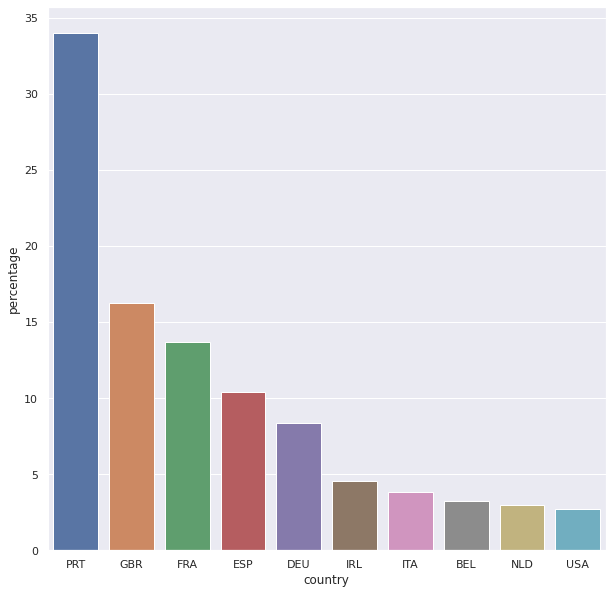

In [51]:
plt.figure(figsize=(10,10))
ax = sns.barplot(x="country", y="percentage", data=top_10_countries)